In [193]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

### FINAL APPROACH

In [545]:
src = cv2.imread('Wrap.jpg',cv2.IMREAD_GRAYSCALE)

In [546]:
color_image = cv2.imread('Wrap.jpg')

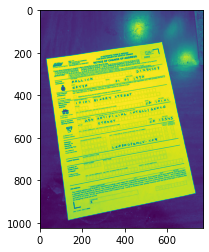

In [547]:
plt.imshow(src)

In [548]:
img = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernel, iterations= 3)

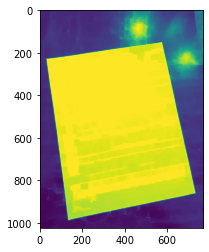

In [549]:
plt.imshow(img)

### 1. Add some padding along all the directions

In [550]:
int(img.shape[0]/2)

512

In [551]:
#Should be automated
import numpy as np
padding = np.zeros((int(img.shape[0]+img.shape[0]/2),int(img.shape[1]+img.shape[1]/2)))

In [552]:
padding_color = np.zeros((int(img.shape[0]+img.shape[0]/2),int(img.shape[1]+img.shape[1]/2),3))

In [553]:
padding.shape

(1536, 1152)

In [554]:
padding_color.shape

(1536, 1152, 3)

### 2. Overlay the image on to the padding template


In [555]:
#Hyper parameter 127--->>160
edges = cv2.Canny(img,160,255,None,3)

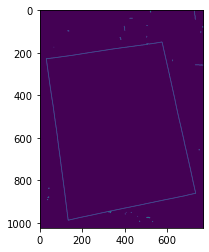

In [556]:
plt.imshow(edges)

In [557]:
padding[int(img.shape[0]/4):int(img.shape[0]+img.shape[0]/4),int(img.shape[1]/4):int(img.shape[1]+img.shape[1]/4)] = edges

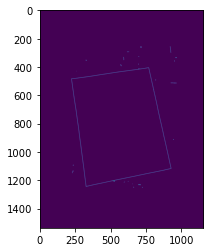

In [558]:
plt.imshow(padding)

In [559]:
pad_test = padding.astype(np.uint8)

In [560]:
#Hough lines

linesP = cv2.HoughLinesP(pad_test, 1, np.pi / 180, 50, None, 50, 10)

cdstP = np.zeros_like(padding)


if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (255,255,255), 3, cv2.LINE_AA)

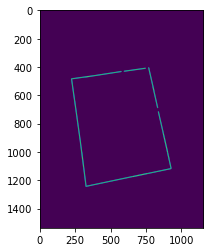

In [561]:
plt.imshow(cdstP)

In [562]:
slopes = []
intercepts =  [ ]
x1_pts = []
y1_pts = []
x2_pts = []
y2_pts = []

for line in linesP:
    x1,y1 = line[0][0],line[0][1]
    x2,y2 = line[0][2],line[0][3]
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1
    slopes.append(slope)
    intercepts.append(intercept)
    x1_pts.append(x1)
    y1_pts.append(y1)
    x2_pts.append(x2)
    y2_pts.append(y2)

In [563]:
if len(slopes)==0:
    print("Image is aligned perfectly")
else:
    print("Allignment should be done")

Allignment should be done


In [564]:
for i in range(1,len(linesP)):
    y_pred = slopes[i]*x1_pts[0] + intercepts[i]
    print(y_pred)
    print(slopes[i])

1204.8
7.066666666666666
468.77181208053685
-0.14093959731543623
1241.0
8.0
471.2261904761904
-0.15476190476190477
-1511.3846153846155
4.384615384615385
-1532.3783783783783
4.405405405405405
1240.2800000000002
7.84
1214.842105263158
7.2105263157894735
1242.6842105263158
-0.21052631578947367
-1552.6363636363633
4.454545454545454
-1517.2
4.4
470.29370629370635
-0.13986013986013987
-1560.5217391304352
4.478260869565218


In [565]:
y1_pts[0]

1242

In [566]:
slopes[0]

-0.2107728337236534

In [567]:
linesP

array([[[ 323, 1242,  750, 1152]],

       [[ 221,  484,  251,  696]],

       [[ 591,  431,  740,  410]],

       [[ 293, 1001,  323, 1241]],

       [[ 318,  472,  570,  433]],

       [[ 831,  716,  896, 1001]],

       [[ 763,  406,  800,  569]],

       [[ 281,  911,  306, 1107]],

       [[ 243,  638,  281,  912]],

       [[ 654, 1173,  920, 1117]],

       [[ 793,  541,  826,  688]],

       [[ 866,  872,  906, 1048]],

       [[ 225,  484,  368,  464]],

       [[ 897, 1010,  920, 1113]]], dtype=int32)

In [568]:
#Create lists for all the points
point_0 = []
point_1 = []
point_2 = []
point_3 = []
point_4 = []
point_5 = []
point_6 = []
point_7 = []
point_8 = []
point_9 = []

In [569]:
final_pts = []
for i in range(len(linesP)):
    print('----------')
    test_point = i
    pred_point = y1_pts[i]
    dummy_list = []
    for j in range(len(linesP)):
        
        y_pred = slopes[j]*x1_pts[i] + intercepts[j]
        slope_pred = slopes[j]
        max_range = pred_point+20
        min_range = pred_point-20
        slope_max = slopes[i]+1
        slope_min  = slopes[i]-1
        if (y_pred <= max_range and y_pred >= min_range) and (slope_pred <= slope_max and slope_pred >= slope_min):
            print(j)
            dummy_list.append(j)
    final_pts.append(min(dummy_list))        

----------
0
9
----------
1
8
----------
2
4
12
----------
1
3
7
8
----------
2
4
12
----------
5
6
10
11
13
----------
5
6
10
11
13
----------
1
3
7
8
----------
1
8
----------
0
9
----------
5
6
10
11
13
----------
5
6
10
11
13
----------
2
4
12
----------
5
6
10
11
13


In [570]:
final_pts

[0, 1, 2, 1, 2, 5, 5, 1, 1, 0, 5, 5, 2, 5]

In [571]:
final_pts = set(final_pts)

In [572]:
final_pts

{0, 1, 2, 5}

In [573]:
final_pts_list = list(final_pts)

In [574]:
final_pts_list[0]

0

In [575]:
#0,1,2,4 are the indexes of lines

In [576]:
#if 2 slopes are within range of 0.7 they are paralell

In [577]:
first_point = slopes[final_pts_list[0]]
paralell_pair_1 = [final_pts_list[0]]
paralell_pair_2 = []
non_paralell_index = 0
for i in final_pts_list:
    max_range = first_point + 0.6
    min_range = first_point - 0.6
    if slopes[i]<=max_range and slopes[i]>=min_range and i!=final_pts_list[0]:
        print("The index point parallel to first point is ",i)
        paralell_pair_1.append(i)

The index point parallel to first point is  2


In [578]:
paralell_pair_1

[0, 2]

In [579]:
def line_intersection(line1, line2):
    m1, c1 = line1
    m2, c2 = line2

    # Calculate the x-coordinate of the intersection point
    x = (c2 - c1) / (m1 - m2)

    # Calculate the y-coordinate of the intersection point
    y = m1 * x + c1

    return x, y

In [580]:
intersection_points = []

for index in final_pts_list:
    if index not in paralell_pair_1:
        intersection_points.append(line_intersection((slopes[paralell_pair_1[0]],intercepts[paralell_pair_1[0]]), (slopes[index],intercepts[index])))
        intersection_points.append(line_intersection((slopes[paralell_pair_1[1]],intercepts[paralell_pair_1[1]]), (slopes[index],intercepts[index])))

In [581]:
intersection_points

[(328.1116879773449, 1240.9225950399039),
 (220.8817431249612, 483.16431808305913),
 (922.1625700733075, 1115.7128072445018),
 (760.5499657768651, 407.1036960985626)]

In [582]:
#sort points based on height
sorted_points = sorted(intersection_points, key=lambda p: p[1])
sorted_points

[(760.5499657768651, 407.1036960985626),
 (220.8817431249612, 483.16431808305913),
 (922.1625700733075, 1115.7128072445018),
 (328.1116879773449, 1240.9225950399039)]

In [583]:
top_2_points = sorted_points[:2]
last_2_points = sorted_points[2:]

In [584]:
top_2_points = sorted(top_2_points, key=lambda p: p[0])
last_2_points = sorted(last_2_points, key=lambda p: p[0])

In [585]:
top_2_points

[(220.8817431249612, 483.16431808305913),
 (760.5499657768651, 407.1036960985626)]

In [586]:
last_2_points

[(328.1116879773449, 1240.9225950399039),
 (922.1625700733075, 1115.7128072445018)]

In [587]:
tl = top_2_points[0]
tr = top_2_points[1]
br = last_2_points[1]
bl = last_2_points[0]

In [588]:


# Finding the maximum width.
widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
maxWidth = max(int(widthA), int(widthB))
# Finding the maximum height.
heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
maxHeight = max(int(heightA), int(heightB))
# Final destination co-ordinates.
destination_corners = [[0, 0], [maxWidth, 0], [maxWidth, maxHeight], [0, maxHeight]]


In [589]:
destination_corners

[[0, 0], [607, 0], [607, 765], [0, 765]]

In [590]:
padding_color_copy = padding_color.copy()

In [591]:
padding_color_copy = padding_color_copy.astype(np.uint8)

In [592]:
padding_color_copy.shape

(1536, 1152, 3)

In [593]:
color_image.shape

(1024, 768, 3)

In [594]:
padding_color_copy[int(img.shape[0]/4):int(img.shape[0]+img.shape[0]/4),int(img.shape[1]/4):int(img.shape[1]+img.shape[1]/4)]+=color_image

In [595]:
color_image.shape

(1024, 768, 3)

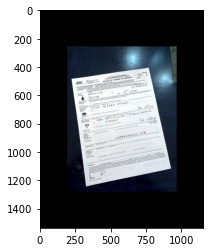

In [596]:
plt.imshow(padding_color_copy)

In [597]:
corners = (tl,tr,br,bl)

In [598]:
M = cv2.getPerspectiveTransform(np.float32(corners), np.float32(destination_corners))
final = cv2.warpPerspective(padding_color_copy, M, (destination_corners[2][0], destination_corners[2][1]), flags=cv2.INTER_LINEAR)

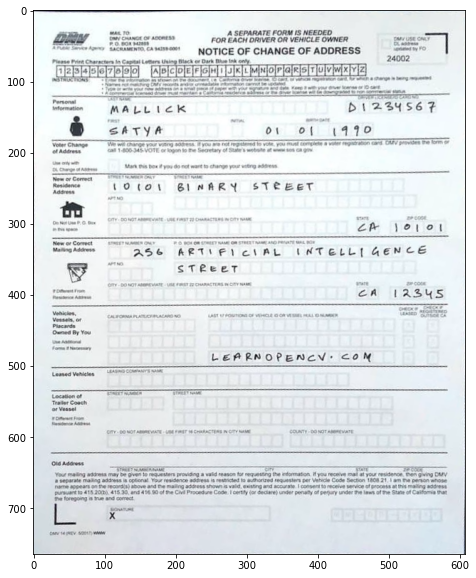

In [600]:
plt.figure(figsize=(10,10))
plt.imshow(final)